<a href="https://colab.research.google.com/github/fsl60/DataAnalysis/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


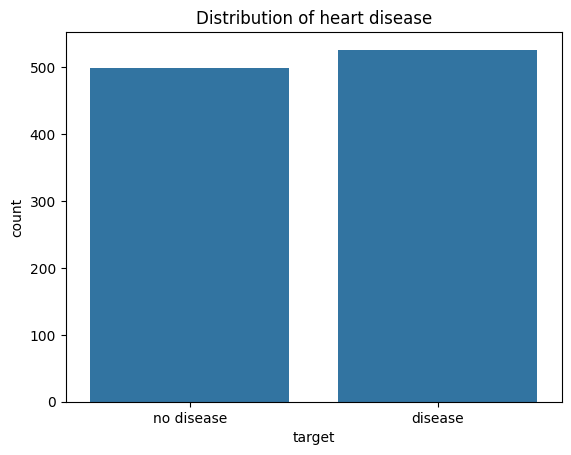

In [8]:
# Distribution of heart disease
sns.countplot(x='target',data=df) # 0= no heart disease, 1= heart disease
plt.title("Distribution of heart disease")
plt.xticks(ticks=[0,1], labels=['no disease', 'disease'], rotation=0)

plt.show()

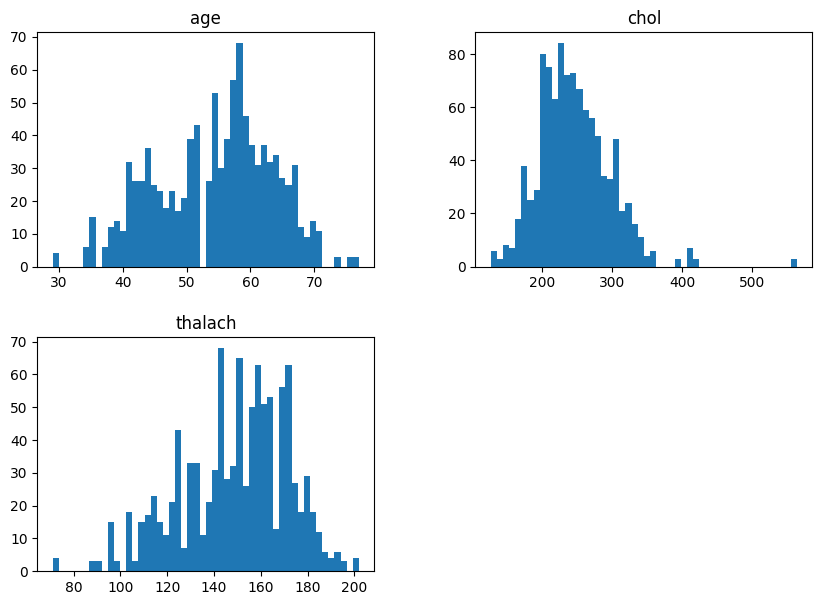

In [9]:
df[["age","chol","thalach"]].hist(bins=50,figsize=(10,7),grid=False)
plt.show()

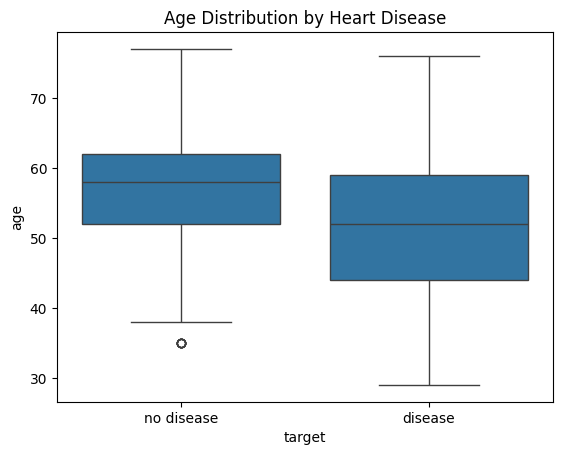

In [10]:
# Box plot
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease')
plt.xticks(ticks=[0,1], labels=['no disease', 'disease'], rotation=0)
plt.show()


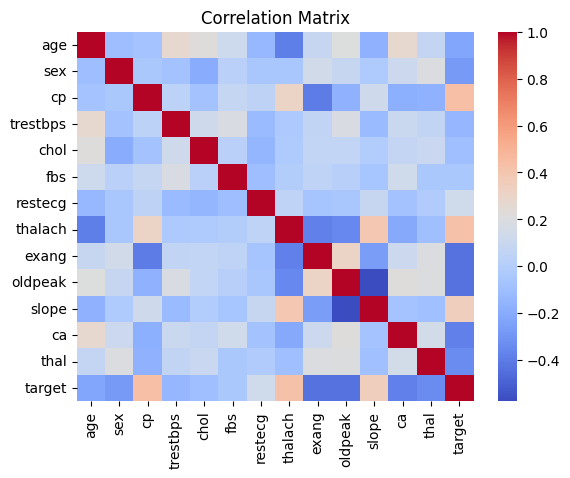

In [11]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


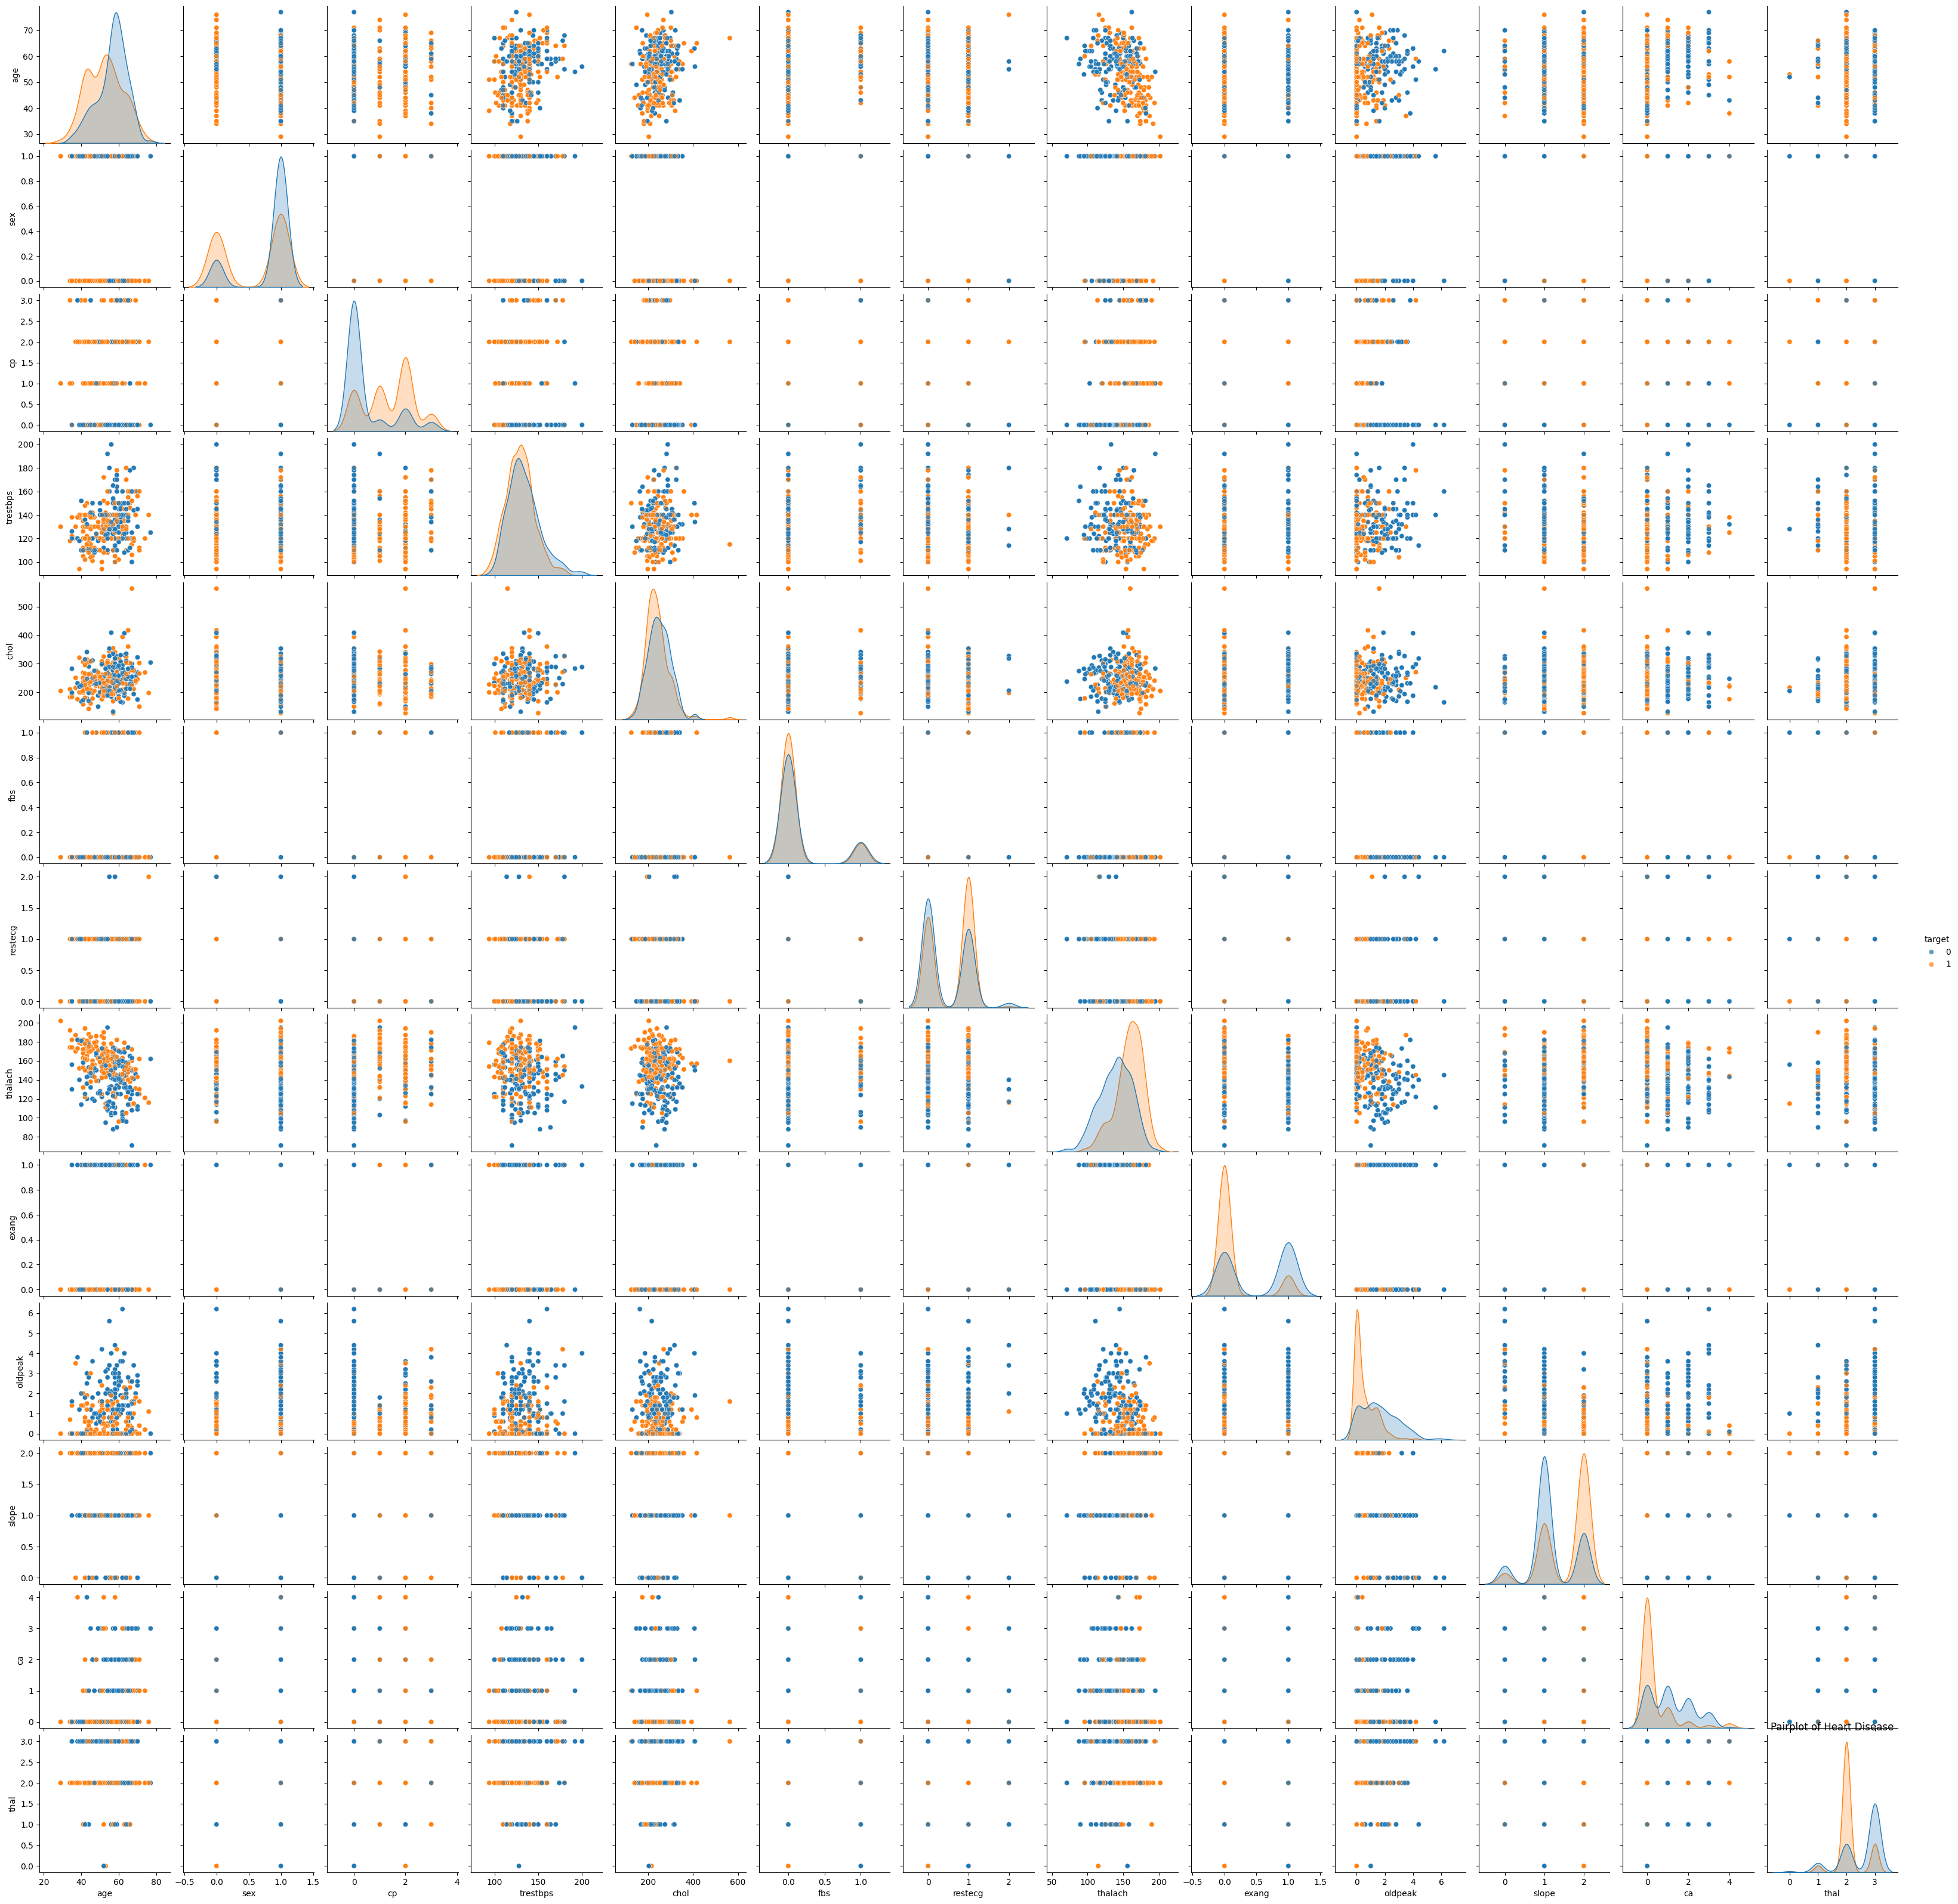

In [12]:
sns.pairplot(df, hue='target',plot_kws={'alpha': 0.7})
plt.title('Pairplot of Heart Disease')
plt.show()


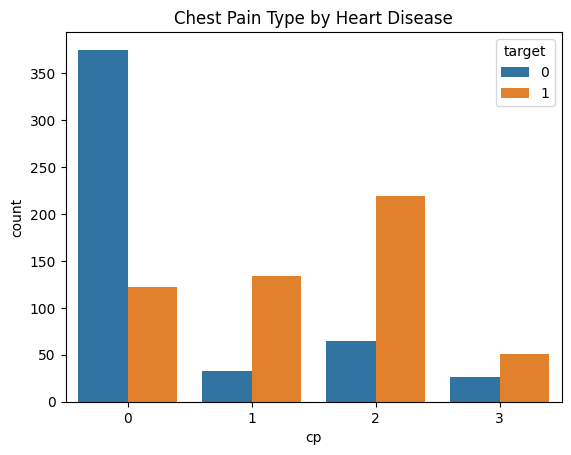

In [13]:
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type by Heart Disease')
plt.show()


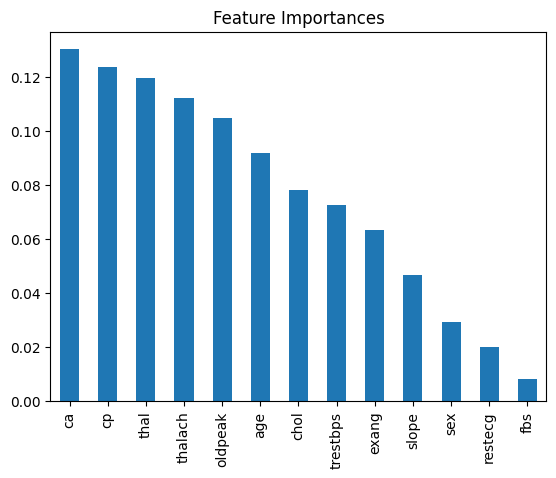

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(df.drop('target', axis=1), df['target'])
importances = model.feature_importances_

# Visualize feature importances
features = df.drop('target', axis=1).columns
feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show() # It is showing which value is important in determining the heart disease.


cp:Chest Pain, it is one of the most important factor in determining the heart disease.


##Question and answer related to heart disease

target
disease       526
no disease    499
Name: count, dtype: int64


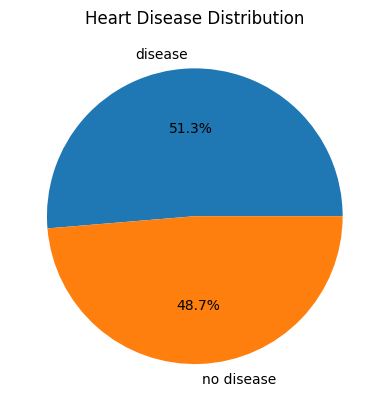

In [15]:
df['target'] = df['target'].replace({0: 'no disease', 1: 'disease'})

# Get distribution
distribution = df['target'].value_counts()
print(distribution)

# Plot distribution
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%')
plt.title('Heart Disease Distribution')
plt.show()

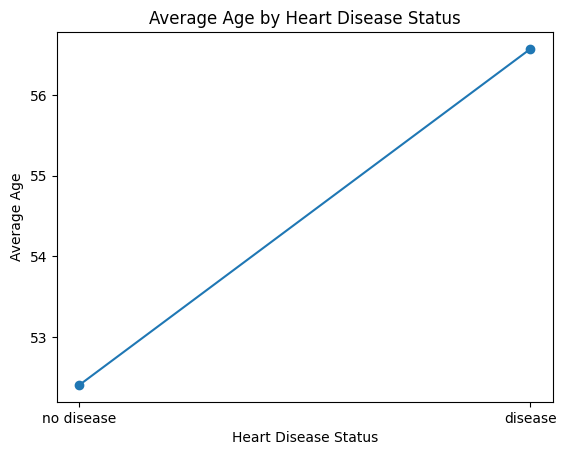

In [16]:
# Calculate average age by heart disease status
average_age = df.groupby('target')['age'].mean()
plt.plot(average_age.index, average_age.values, marker='o')
plt.title('Average Age by Heart Disease Status')
plt.xticks(ticks=[0, 1], labels=['no disease', 'disease'], rotation=0)
plt.xlabel('Heart Disease Status')
plt.ylabel('Average Age')
plt.show()

target
disease       240.979087
no disease    251.292585
Name: chol, dtype: float64


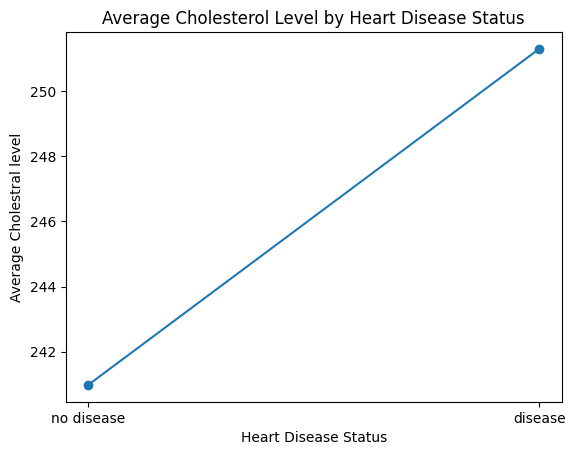

In [17]:
# Calculate average cholesterol level by heart disease status
average_cholesterol = df.groupby('target')['chol'].mean()
print(average_cholesterol)
plt.plot(average_cholesterol.index, average_cholesterol.values, marker='o')
plt.title('Average Cholesterol Level by Heart Disease Status')
plt.xticks(ticks=[0, 1], labels=['no disease', 'disease'], rotation=0)
plt.xlabel("Heart Disease Status")
plt.ylabel("Average Cholestral level")
plt.show()



Text(0, 0.5, 'Count')

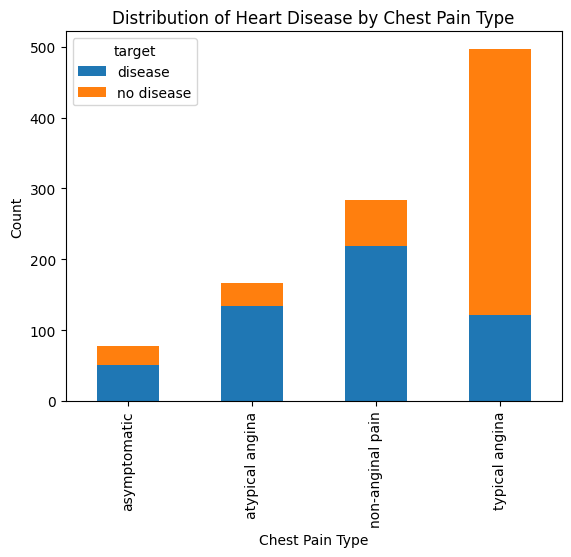

In [23]:
# Replace numerical values with descriptive labels for chest pain type
df['cp'] = df['cp'].replace({
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal pain',
    3: 'asymptomatic'
})

# Distribution of heart disease by chest pain type
chest_pain_distribution = df.groupby('cp')['target'].value_counts().unstack()
chest_pain_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')


In [19]:
# Filter dataset for patients with heart disease
disease_df = df[df['target'] == 'disease']

# Calculate correlation
correlation = disease_df[['age', 'chol']].corr().iloc[0, 1]
print(f'Correlation between age and cholesterol in patients with heart disease: {correlation}')


Correlation between age and cholesterol in patients with heart disease: 0.2627703246186712


([<matplotlib.axis.XTick at 0x7d251d021840>,
 [Text(0, 0, 'no disease'), Text(1, 0, 'disease')])

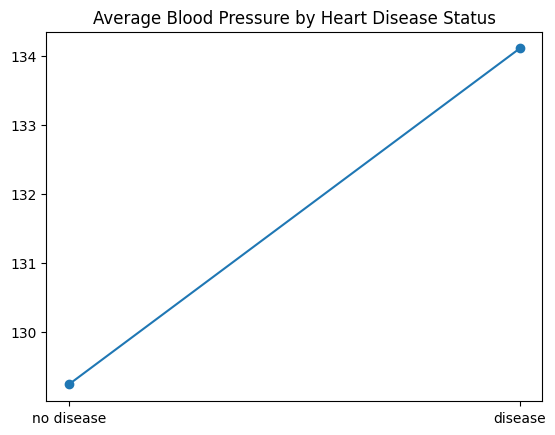

In [20]:
# Calculate average blood pressure by heart disease status
average_blood_pressure = df.groupby('target')['trestbps'].mean()
plt.plot(average_blood_pressure.index, average_blood_pressure.values, marker='o')
plt.title('Average Blood Pressure by Heart Disease Status')
plt.xticks(ticks=[0, 1], labels=['no disease', 'disease'], rotation=0)


<ipython-input-21-aa999e87f401>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_distribution = df.groupby('age_group')['target'].value_counts().unstack()


target     disease  no disease
age_group                     
30-39           38          15
40-49          157          80
50-59          206         216
60-69          101         174
70-79           20          14
80-89            0           0


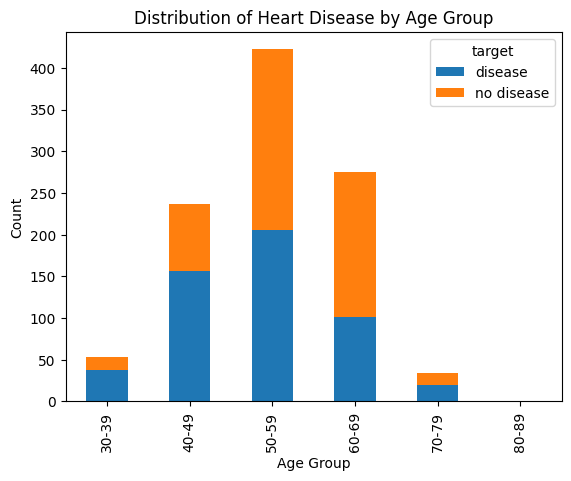

In [21]:
# Define age bins and labels
bins = [29, 39, 49, 59, 69, 79, 89]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Create age group column
data=df
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Distribution of heart disease by age group
age_group_distribution = df.groupby('age_group')['target'].value_counts().unstack()
print(age_group_distribution)
age_group_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()



                Feature  Importance
15    cp_typical angina    0.120506
10                   ca    0.110071
6               thalach    0.105311
8               oldpeak    0.103576
11                 thal    0.098749
0                   age    0.076747
3                  chol    0.069420
2              trestbps    0.066635
7                 exang    0.063185
9                 slope    0.045142
1                   sex    0.033394
5               restecg    0.019620
14  cp_non-anginal pain    0.018984
18      age_group_50-59    0.012794
19      age_group_60-69    0.012497
13   cp_atypical angina    0.011417
12                 cp_3    0.010453
17      age_group_40-49    0.009006
4                   fbs    0.008377
16      age_group_30-39    0.002163
20      age_group_70-79    0.001953
21      age_group_80-89    0.000000


Text(0, 0.5, 'Feature')

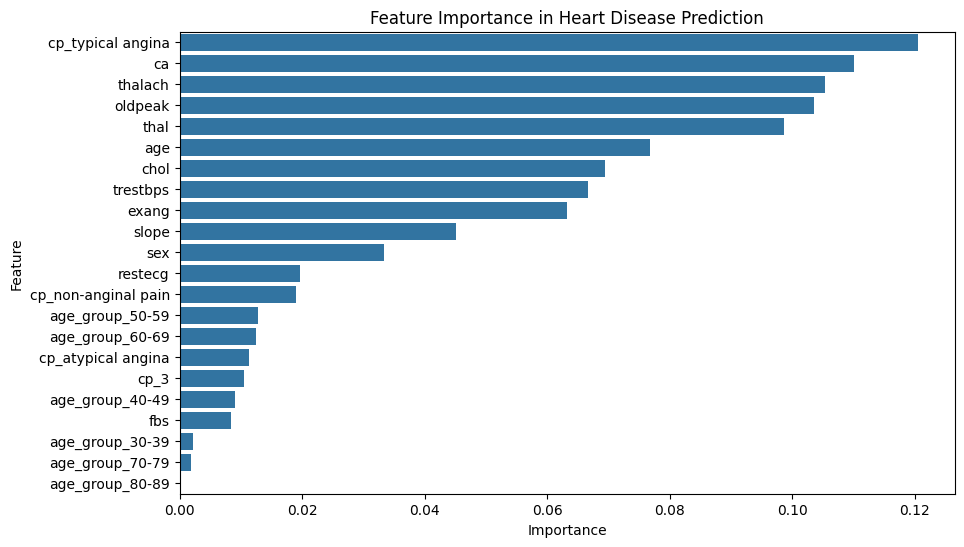

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Prepare features and target variable
#df.drop(['age_group_50-59'])
X = data.drop(['target'], axis=1)
y = data['target'].map({'no disease': 0, 'disease': 1})

# Handle categorical variables (one-hot encoding)
X = pd.get_dummies(X)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Heart Disease Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
